In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
df = pd.read_csv('MKT.csv')

print(df.head(10))
print("-"*30)
print(df.info())
print("-"*30)
print(df.describe())
print("-"*30)
print(df.isnull().sum())

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
5   114.84      1.68       8.88  11.40
6   348.84      4.92      10.20  15.36
7   320.28     52.56       6.00  30.48
8    89.64     59.28      54.84  17.64
9    51.72     32.04      42.12  12.12
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None
------------------------------
          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.0

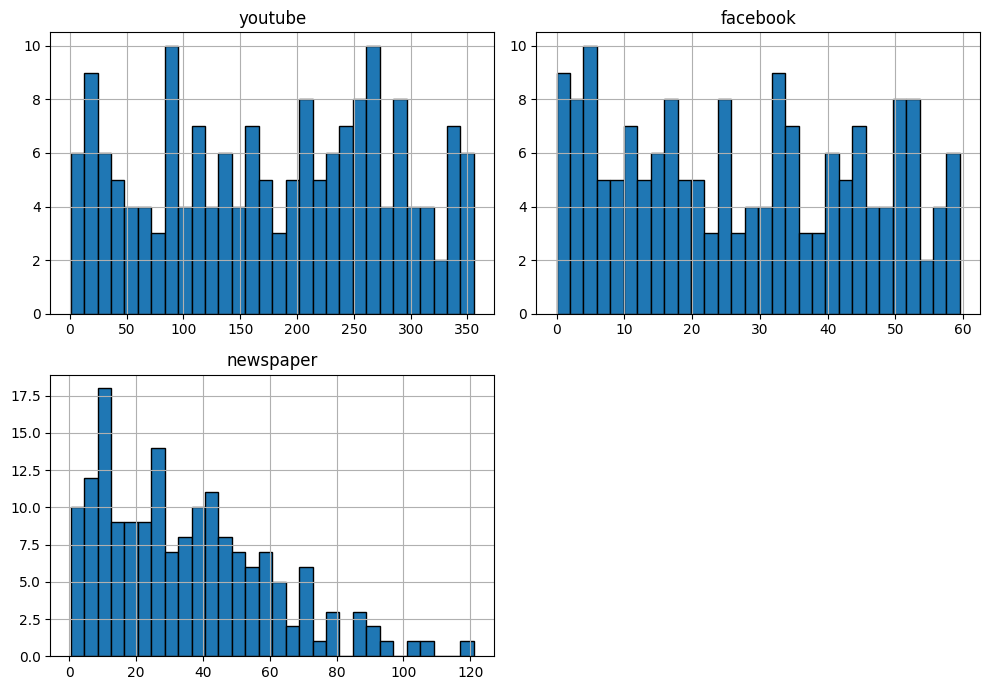

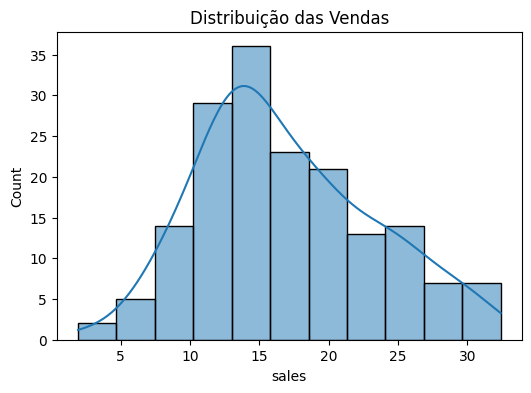

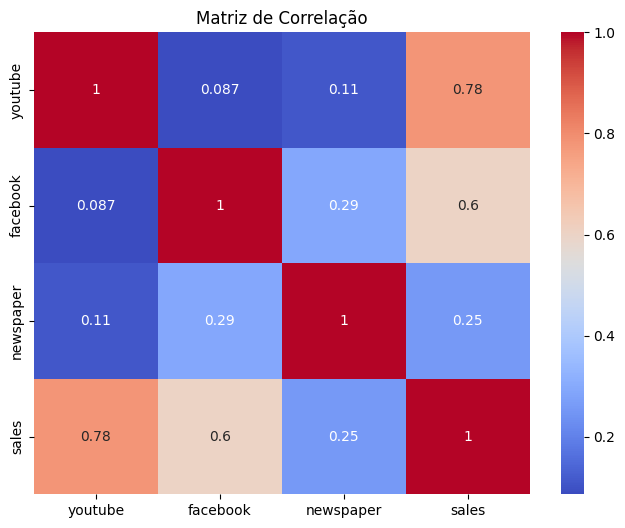

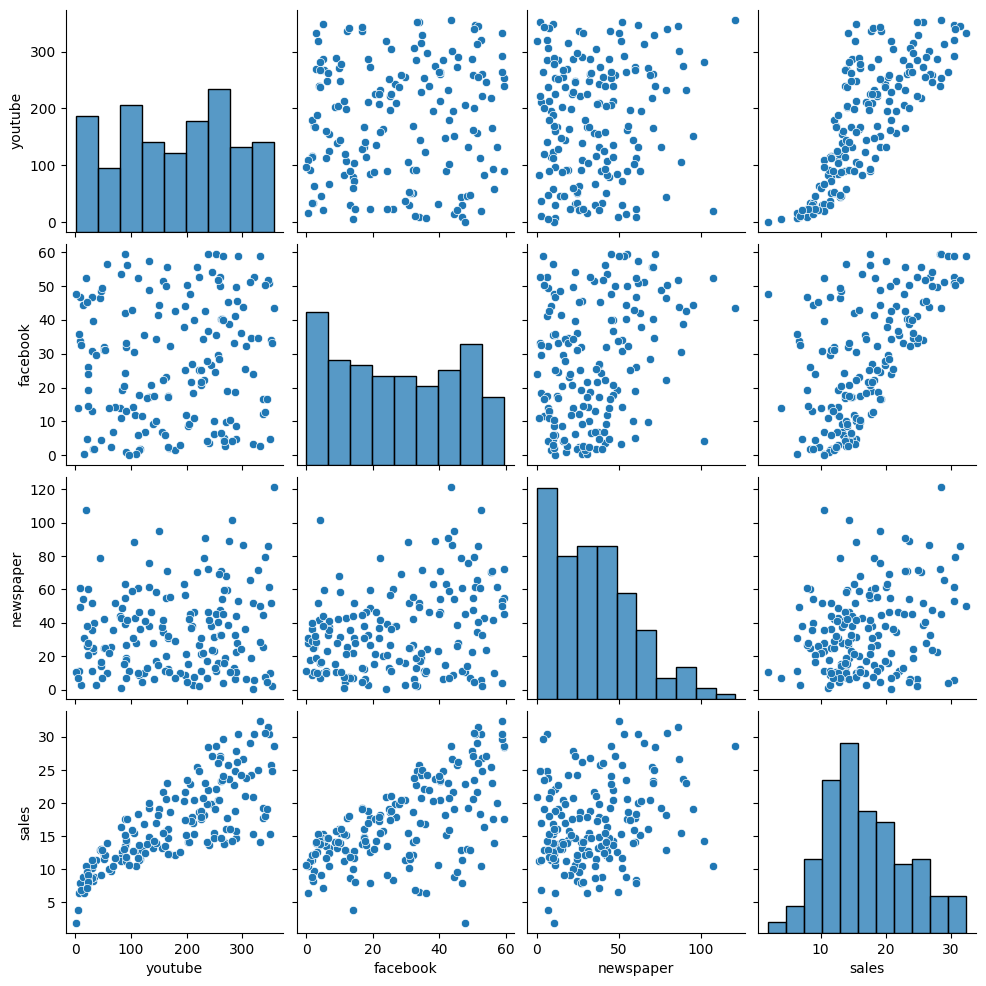

In [51]:
# Histograma Distribuição dos Investimentos
df[['youtube','facebook','newspaper']].hist(bins=30, figsize=(10, 7),edgecolor='black')
plt.tight_layout()

for ax in axes.flatten():
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

# Histograma das vendas
plt.figure(figsize=(6,4))
sns.histplot(df['sales'], kde=True)
plt.title('Distribuição das Vendas')
plt.show()


# Matriz de correlação
corr = df.corr()

# Heatmap da correlação
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Scatter plots
sns.pairplot(df)
plt.show()

Aqui vemos que o histograma da distribuição das vendas não diz muita coisa.

O histograma da distribuição dos investimentos permite entender um pouco quanto foi investido em cada plataforma, mas também não diz muito.

Com o Heatmap e o Scatter podemos ver a relação de investimento e retorno com o youtube é mais evidente, enquanto facebook vemos menos retorno e com jornais, pouca relação.

In [44]:
# Função para remover outliers usando IQR
def remove_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

# Aplicar a função em todas as colunas numéricas
for coluna in ['youtube', 'facebook', 'newspaper', 'sales']:
    df = remove_outliers(df, coluna)


# Informações sobre DF atualizado

print(df.info())
print("-"*30)
print(df.describe())
print("-"*30)
print(df.isnull().sum())


In [52]:
x = df[['youtube','facebook','newspaper']]
y = df['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {x_train.shape}")
print(f"Tamanho do conjunto de teste: {x_test.shape}")

Tamanho do conjunto de treino: (136, 3)
Tamanho do conjunto de teste: (35, 3)


In [53]:
# Instanciar o modelo
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(x_train, y_train)

# Previsões no conjunto de teste
y_pred = modelo.predict(x_test)

In [54]:
# Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")

# Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")


Erro Quadrático Médio (MSE): 5.576790234026713
Coeficiente de Determinação (R²): 0.872863085701216


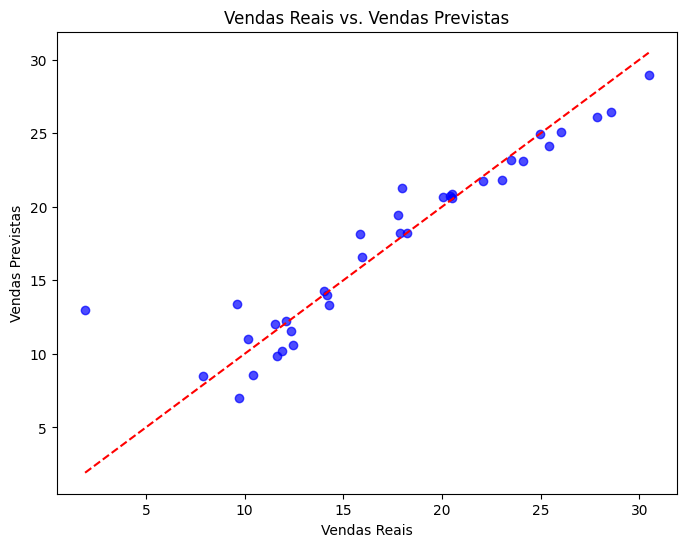

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Previstas')
plt.title('Vendas Reais vs. Vendas Previstas')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.show()


In [59]:
# Coeficientes das features
coeficientes = pd.DataFrame({
    'Feature': x.columns,
    'Coeficiente': modelo.coef_
})

print(coeficientes)
print("")
print("Coeficientes Positivos: Indicam que, conforme o investimento na respectiva plataforma aumenta, as vendas tendem a aumentar.")
print("Coeficientes Negativos: Indicam que, conforme o investimento na respectiva plataforma aumenta, as vendas tendem a diminuir.")


     Feature  Coeficiente
0    youtube     0.044186
1   facebook     0.194482
2  newspaper    -0.000049

Coeficientes Positivos: Indicam que, conforme o investimento na respectiva plataforma aumenta, as vendas tendem a aumentar.
Coeficientes Negativos: Indicam que, conforme o investimento na respectiva plataforma aumenta, as vendas tendem a diminuir.
